In [1]:
### IMPORTS ###
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### SETTINGS ###
np.set_printoptions(precision=3, suppress=True, threshold=np.inf)

In [3]:
### FOLDER SETTINGS ###
input_folder = "../output/"
output_folder = "output/"

file_solution_path = input_folder + "/system_solution.dat"  # Replace with your actual file path

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [4]:
format_string = '<d'  # '<d' for little-endian, '>d' for big-endian

In [5]:
### FUNCTIONS ###
def u_analytical_poisson_2d(global_domain_begin, global_indices, dx):
    point = global_domain_begin + (np.array(global_indices) - 1) * np.array(dx)
    func_val = np.prod(np.sin(np.pi * point))
    return func_val

In [6]:
with open(file_solution_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)

    approximate_solution = data

approximate_solution = np.array(approximate_solution)

In [7]:
print(approximate_solution)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.191 0.345 0.43
 0.43  0.345 0.191 0.    0.    0.345 0.622 0.775 0.775 0.622 0.345 0.
 0.    0.43  0.775 0.967 0.967 0.775 0.43  0.    0.    0.43  0.775 0.967
 0.967 0.775 0.43  0.    0.    0.345 0.622 0.775 0.775 0.622 0.345 0.
 0.    0.191 0.345 0.43  0.43  0.345 0.191 0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


In [8]:
grid_size = int(np.sqrt(approximate_solution.size))
print("Grid size: ", grid_size)

Grid size:  8


In [9]:
domain_begin = np.array([0.0, 0.0])
domain_end = np.array([1.0, 1.0])

In [10]:
# Reshape the data into a 2D array
approximate_solution = np.array(approximate_solution)
approximate_solution = approximate_solution.reshape(grid_size, grid_size)

In [11]:
true_solution = np.zeros((grid_size, grid_size))
dx = abs(domain_end - domain_begin) / (grid_size - 1)

for i in range(1, grid_size + 1):
    for j in range(1, grid_size + 1):
        true_solution[i - 1, j - 1] = u_analytical_poisson_2d(domain_begin, [i, j], dx)

error = np.abs(approximate_solution - true_solution)
print("Max error: ", np.max(error))
print("Mean error: ", np.mean(error))
print("Std dev error: ", np.std(error))


Max error:  0.016112882047904842
Mean error:  0.005084409021534177
Std dev error:  0.00539930067910228


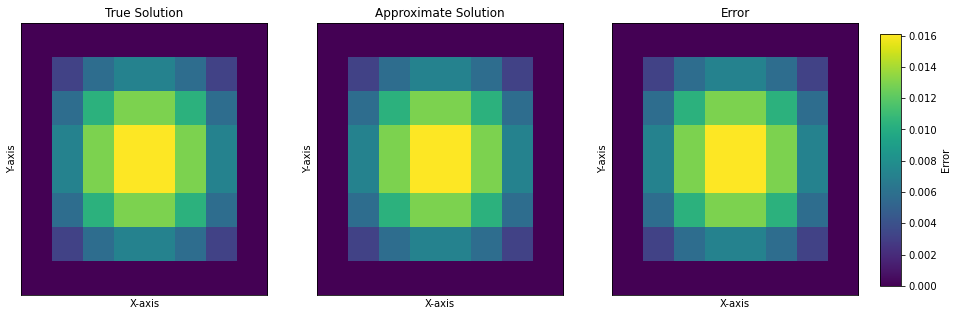

In [12]:
# Plot the true solution, the approximate solution, and the error side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the true solution
im0 = axs[0].imshow(true_solution, cmap='viridis', aspect='auto')
axs[0].set_title('True Solution')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].grid(False)

# Plot the approximate solution
im1 = axs[1].imshow(approximate_solution, cmap='viridis', aspect='auto')
axs[1].set_title('Approximate Solution')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].grid(False)

# Plot the error
im2 = axs[2].imshow(error, cmap='viridis', aspect='auto')
axs[2].set_title('Error')
axs[2].set_xlabel('X-axis')
axs[2].set_ylabel('Y-axis')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].grid(False)

# Add a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.set_label('Error')

plt.show()
# Save the figures
fig.savefig(output_folder + "solution_comparison_im.png")

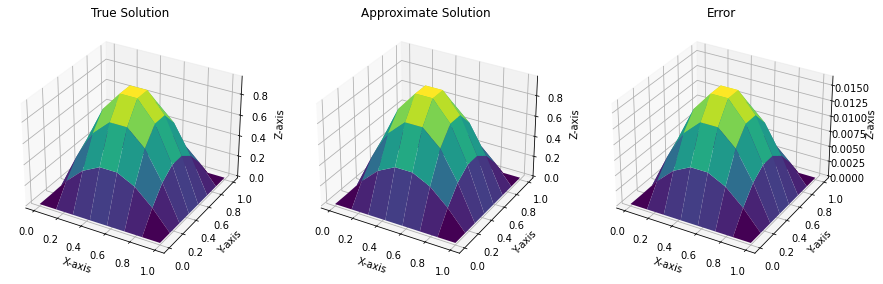

In [13]:
# Create meshgrid for 3D plots
x = np.linspace(domain_begin[0], domain_end[0], grid_size)
y = np.linspace(domain_begin[1], domain_end[1], grid_size)
X, Y = np.meshgrid(x, y)

# Plot the true solution, the approximate solution, and the error side by side
fig = plt.figure(figsize=(15, 5))

# Plot the true solution
ax0 = fig.add_subplot(131, projection='3d')
ax0.plot_surface(X, Y, true_solution, cmap='viridis')
ax0.set_title('True Solution')
ax0.set_xlabel('X-axis')
ax0.set_ylabel('Y-axis')
ax0.set_zlabel('Z-axis')

# Plot the approximate solution
ax1 = fig.add_subplot(132, projection='3d')
ax1.plot_surface(X, Y, approximate_solution, cmap='viridis')
ax1.set_title('Approximate Solution')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')

# Plot the error
ax2 = fig.add_subplot(133, projection='3d')
surf = ax2.plot_surface(X, Y, error, cmap='viridis')
ax2.set_title('Error')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Z-axis')

plt.show()

# Save the figures
fig.savefig(output_folder + "solution_comparison.png")


In [14]:
#np.savetxt(output_folder + "approximate_solution.txt", approximate_solution, fmt='%.3f', delimiter=' ')
#np.savetxt(output_folder + "true_solution.txt", true_solution, fmt='%.3f', delimiter=' ')